## Importación de librerías

In [1]:
import os
os.chdir(os.path.dirname(os.getcwd())) # Change working directory to parent directory

In [2]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from test_harness.datasets.dataset import Dataset
from test_harness.experiments._1_baseline_experiment import BaselineExperiment
from test_harness.experiments._2_response_uncertainty_experiment import UncertaintyKSExperiment
from test_harness.experiments._3_margin_uncertainty_experiment import UncertaintyX2Experiment
from test_harness.experiments._4_margin_threshold_experiment import MarginThresholdExperiment
from test_harness.experiments._5_topline_experiment import ToplineExperiment

from test_harness.utils.utils import (
    plot_experiment_error,
    plot_multiple_experiments,
    aggregate_experiment_metrics,
    plot_KS_drift_distributions,
    plot_XS_drift_margin_distributions
)

import matplotlib.pyplot as plt

%matplotlib inline

## Preparación de los experimentos

In [3]:
def define_run_exps(model, param_grid, dataset, delete_csv=False):

    exps = []

    # baseline experiment
    baseline = BaselineExperiment(model=model, dataset=dataset, param_grid=param_grid, delete_csv=delete_csv)
    # print("Running baseline experiment")
    baseline.run()
    exps.append(baseline)

    # response uncertainty experiment
    uncertainty_ks = UncertaintyKSExperiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        significance_thresh=0.001,
        delete_csv=delete_csv
    )
    # print("Running response uncertainty experiment")
    uncertainty_ks.run()
    exps.append(uncertainty_ks)
    
    # margin uncertainty experiment
    uncertainty_x2 = UncertaintyX2Experiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        significance_thresh=0.01,
        margin_width=0.2,
        delete_csv=delete_csv
    )
    # print("Running margin uncertainty experiment")
    uncertainty_x2.run()
    exps.append(uncertainty_x2)
    
    # margin threshold experiment (sensitivity = 0.5)
    margin_threshold_1 = MarginThresholdExperiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        margin_width=0.2,
        sensitivity=0.5,
        delete_csv=delete_csv
    )
    # print("Running margin threshold experiment; sensitivity=1")
    margin_threshold_1.run()
    exps.append(margin_threshold_1)

    # margin threshold experiment (sensitivity = 2)
    margin_threshold_2 = MarginThresholdExperiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        margin_width=0.2,
        sensitivity=1,
        delete_csv=delete_csv
    )
    # print("Running margin threshold experiment; sensitivity=1")
    margin_threshold_2.run()
    exps.append(margin_threshold_2)

    # topline experiment
    topline = ToplineExperiment(
        model=model,
        dataset=dataset,
        k=5,
        param_grid=param_grid,
        delete_csv=delete_csv
    )
    # print("Running topline experiment")
    topline.run()
    exps.append(topline)
    
    return exps     

## Carga de datos y ejecución de experimentos

### SEA - abrupto

In [4]:
# Load data
change_points = [10000]

column_mapping = {
    "target": "target",
    "int_features": ["v", "w", "x"],
    "float_features": [],
}

dataset_SEA_abr = pd.read_csv("./datasets/_4_data_SEA_abrupto.csv")

model = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=5)
param_grid = {"clf__n_estimators": [5], "clf__max_depth": [5]}

Running experiments with window size = 500


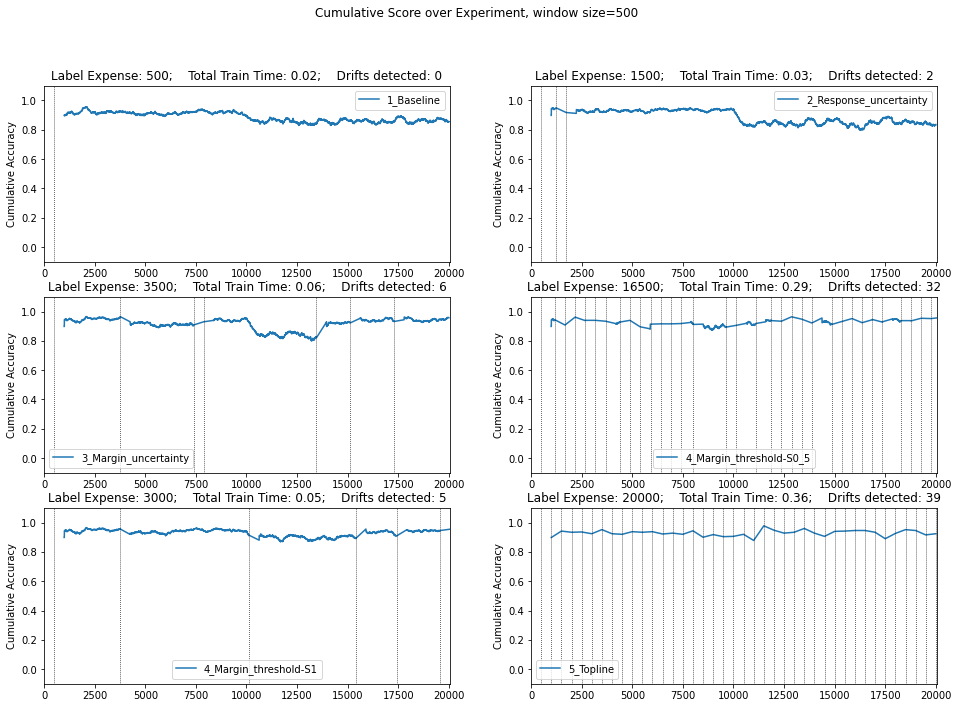

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.025,0,0,0,0,0.856000,0
2_Response_uncertainty,0.03,0.075,2,1,2,1,0.836000,0
3_Margin_uncertainty,0.06,0.175,6,2,6,2,0.958000,0
4_Margin_threshold-S0_5,0.29,0.825,32,0,32,0,0.960177,0
4_Margin_threshold-S1,0.05,0.150,5,0,5,0,0.955189,0
5_Topline,0.36,1.000,39,0,39,0,0.924000,0


Running experiments with window size = 1500


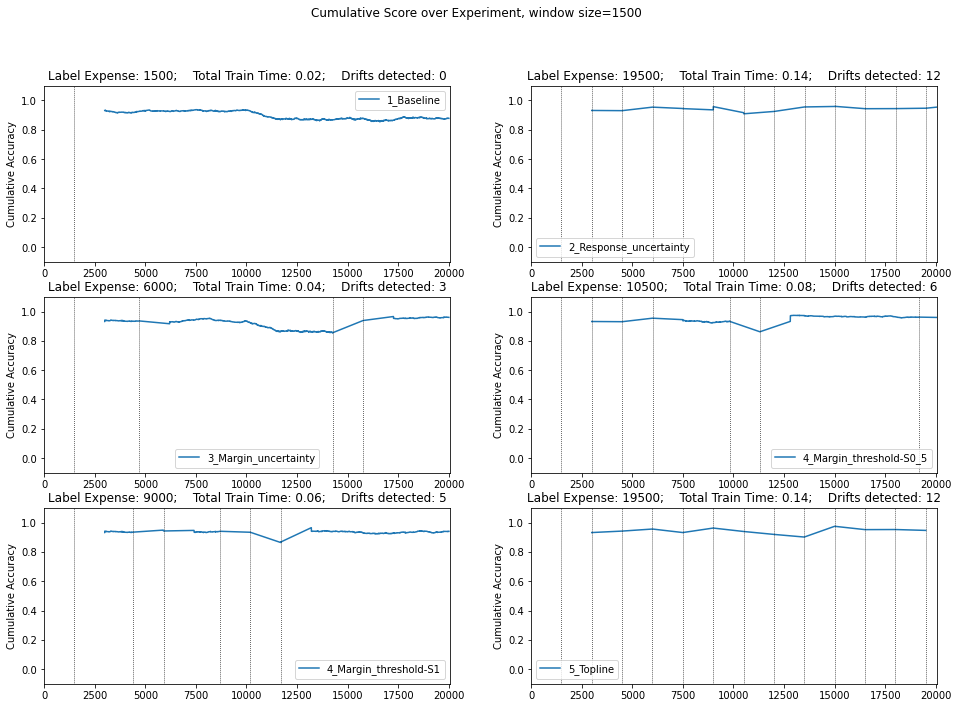

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.075,0,0,0,0,0.878100,0.000000
2_Response_uncertainty,0.14,0.975,12,0,12,0,0.968685,0.000000
3_Margin_uncertainty,0.04,0.300,3,2,3,2,0.960000,0.000000
4_Margin_threshold-S0_5,0.08,0.525,6,1,5,0,0.958184,0.285714
4_Margin_threshold-S1,0.06,0.450,5,1,5,1,0.940000,0.000000
5_Topline,0.14,0.975,12,0,12,0,0.946667,0.000000


Running experiments with window size = 2500


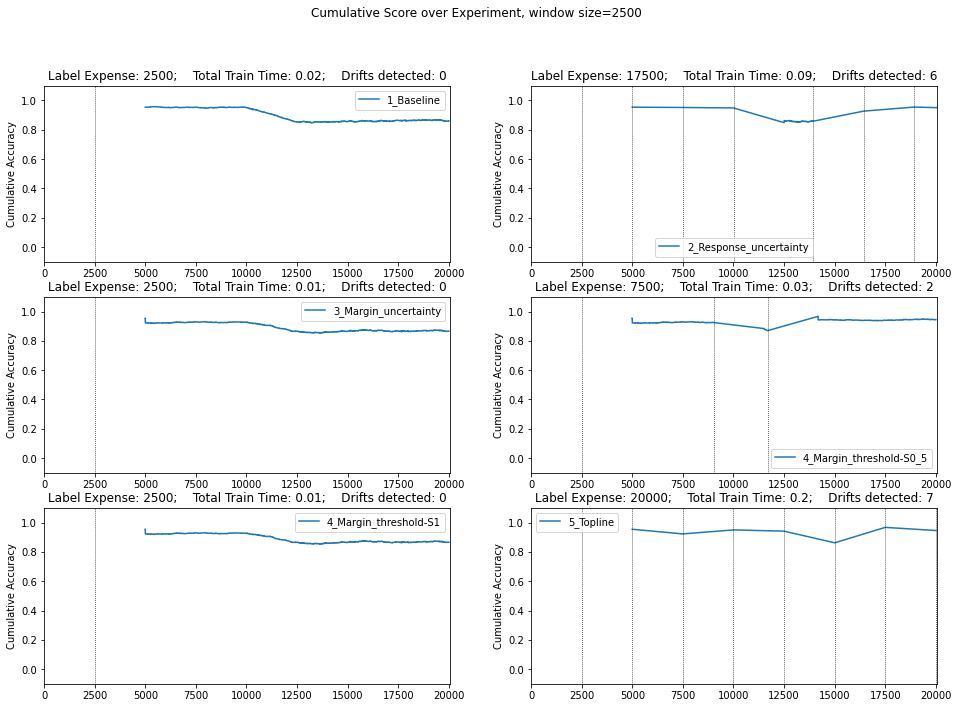

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.125,0,0,0,0,0.860400,0.00
2_Response_uncertainty,0.09,0.875,6,1,6,1,0.946023,0.00
3_Margin_uncertainty,0.01,0.125,0,1,0,1,0.866000,0.00
4_Margin_threshold-S0_5,0.03,0.375,2,1,2,1,0.945200,0.00
4_Margin_threshold-S1,0.01,0.125,0,1,0,1,0.866000,0.00
5_Topline,0.20,1.000,7,1,6,0,0.946000,0.25


Running experiments with window size = 3500


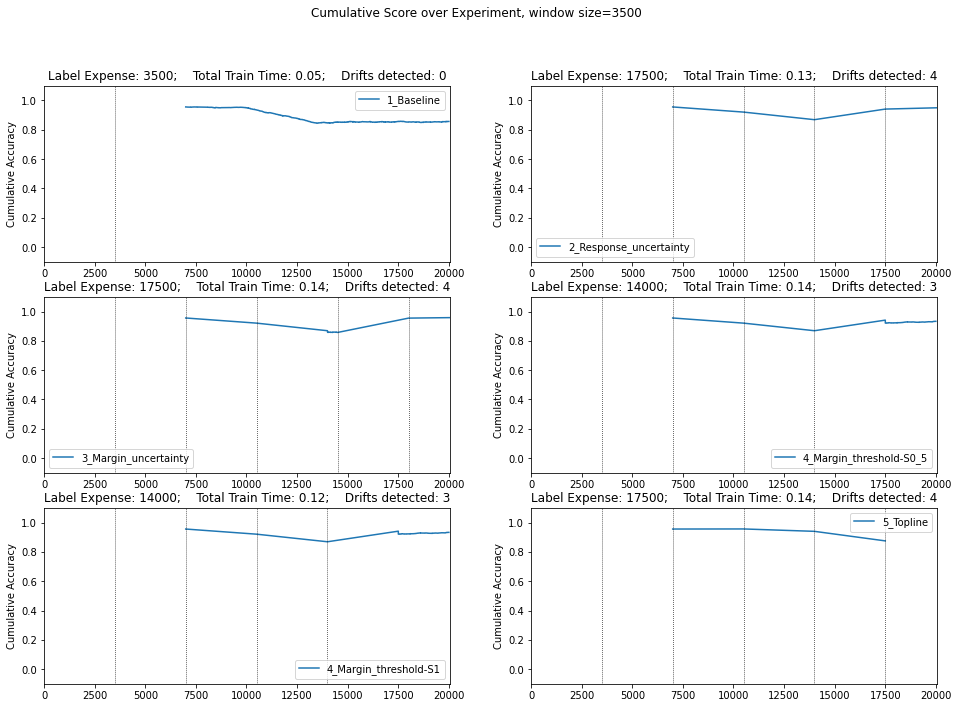

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.05,0.175,0,0,0,0,0.857000,0.0
2_Response_uncertainty,0.13,0.875,4,1,3,0,0.953544,0.4
3_Margin_uncertainty,0.14,0.875,4,1,4,1,0.960824,0.0
4_Margin_threshold-S0_5,0.14,0.700,3,2,2,1,0.933143,0.4
4_Margin_threshold-S1,0.12,0.700,3,2,2,1,0.933143,0.4
5_Topline,0.14,0.875,4,1,3,0,0.875143,0.4


In [5]:
# Run experiments
delete_csv=True
for size_w in [500, 1500, 2500, 3500]:
    # Define dataset
    name_ds = "_4_data_SEA_abrupto"
    dataset_4 = Dataset(name_ds, full_df=dataset_SEA_abr, column_mapping=column_mapping, window_size=size_w)
    # Run experiments
    print(f"Running experiments with window size = {dataset_4.window_size}")
    exps = define_run_exps(model, param_grid, dataset_4, delete_csv=delete_csv)
    delete_csv=False
    #Plot results
    fig, axs = plt.subplots(ncols=2, nrows=3, figsize = (16,11))
    axs = axs.flatten()
    i = 0
    for exp in exps:
        plot_experiment_error(exp, show_trainings=True, ax=axs[i])
        i+=1
    fig.suptitle(f"Cumulative Score over Experiment, window size={dataset_4.window_size}")
    plt.show()
    #plot_multiple_experiments(exps, change_points)
    display(aggregate_experiment_metrics(exps))


##### Inspección visual de resultados

Visualización de la distribución en las zonas detectadas como drift en Exp 2:


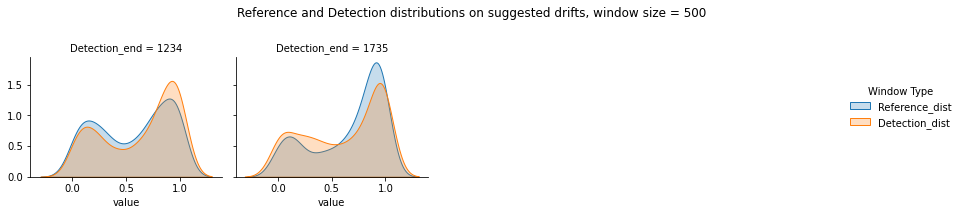

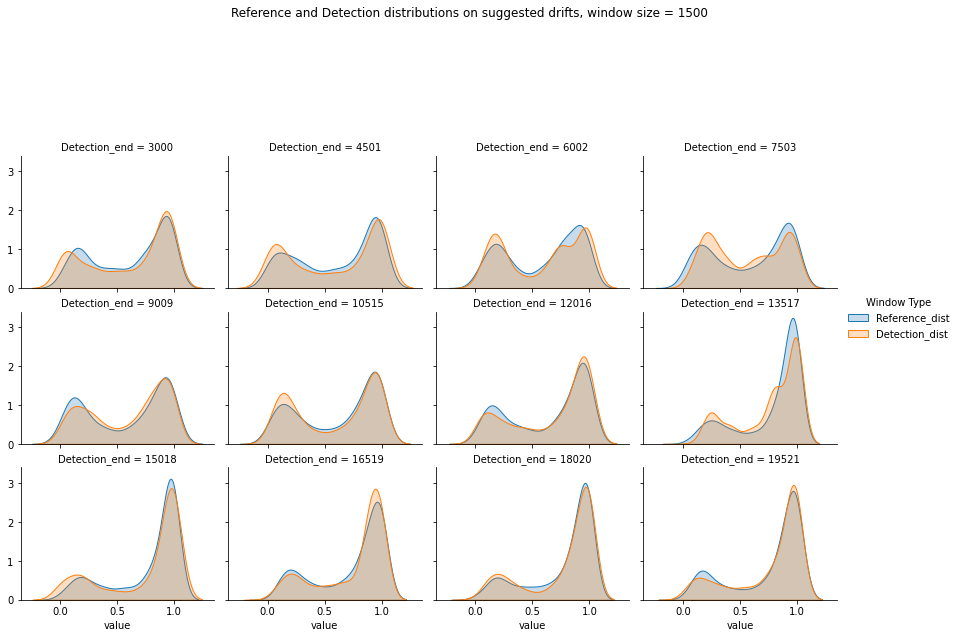

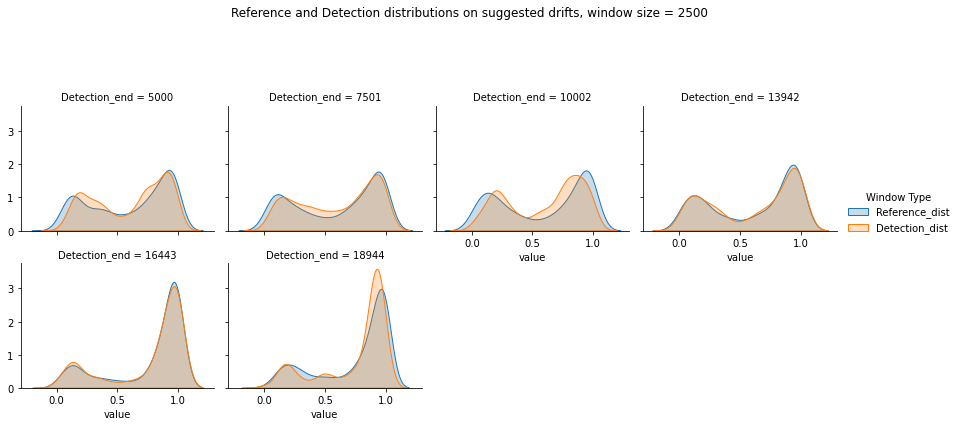

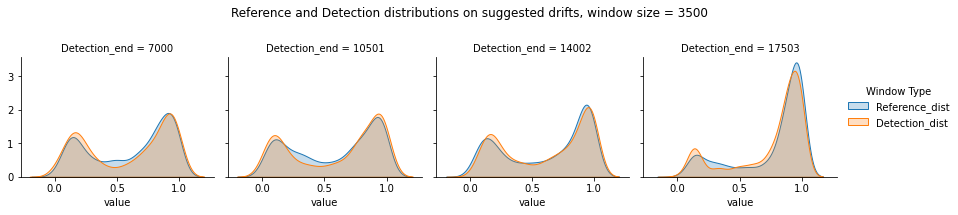

In [10]:
results_KS = pd.read_csv("./results/_4_data_SEA_abrupto_2_Response_uncertainty_results.csv", sep=",")

print("Visualización de la distribución en las zonas detectadas como drift en Exp 2:")
plot_KS_drift_distributions(results_KS,[500, 1500, 2500, 3500])

Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:


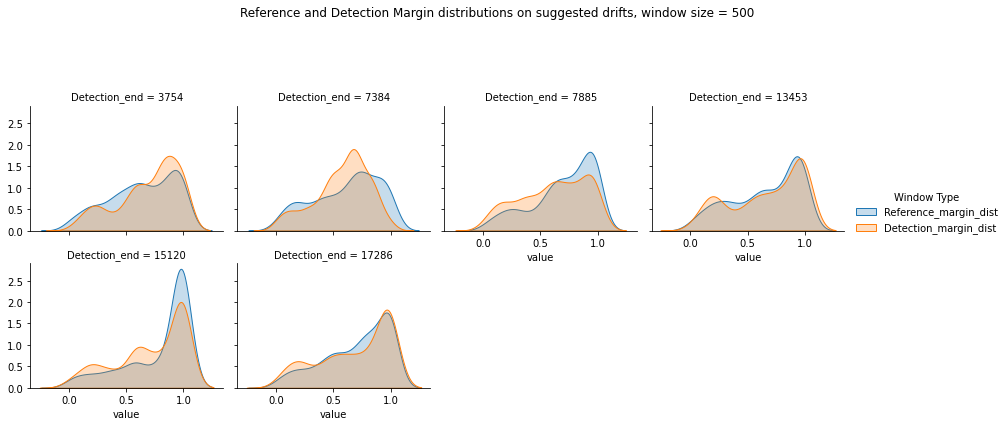

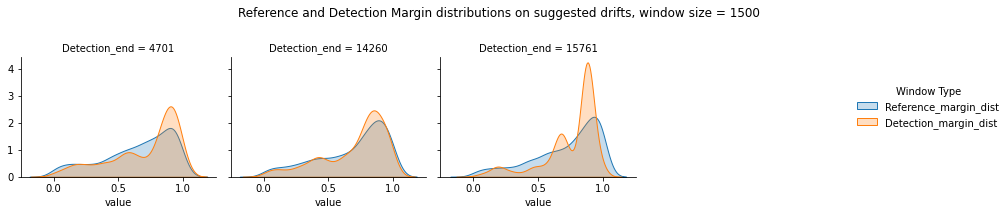

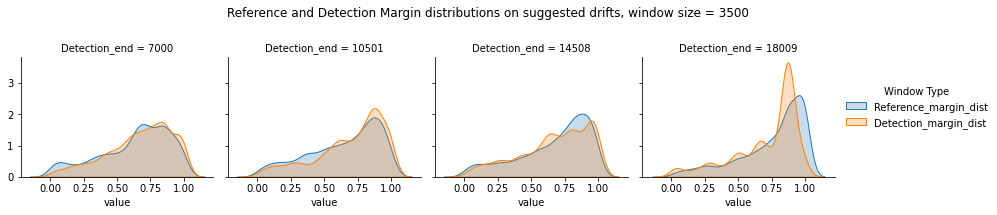

In [11]:
results_XS = pd.read_csv("./results/_4_data_SEA_abrupto_3_Margin_uncertainty_results.csv", sep=",", low_memory=False)

print("Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:")
plot_XS_drift_margin_distributions(results_XS, [500, 1500, 2500, 3500])

### SEA - recurrente

In [6]:
# Load data
change_points = [5000,10000,15000]

column_mapping = {
    "target": "target",
    "int_features": ["v", "w", "x"],
    "float_features": [],
}

dataset_SEA_rec = pd.read_csv("./datasets/_5_data_SEA_recurrente.csv")

model = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=5)
param_grid = {"clf__n_estimators": [5], "clf__max_depth": [5]}

Running experiments with window size = 500


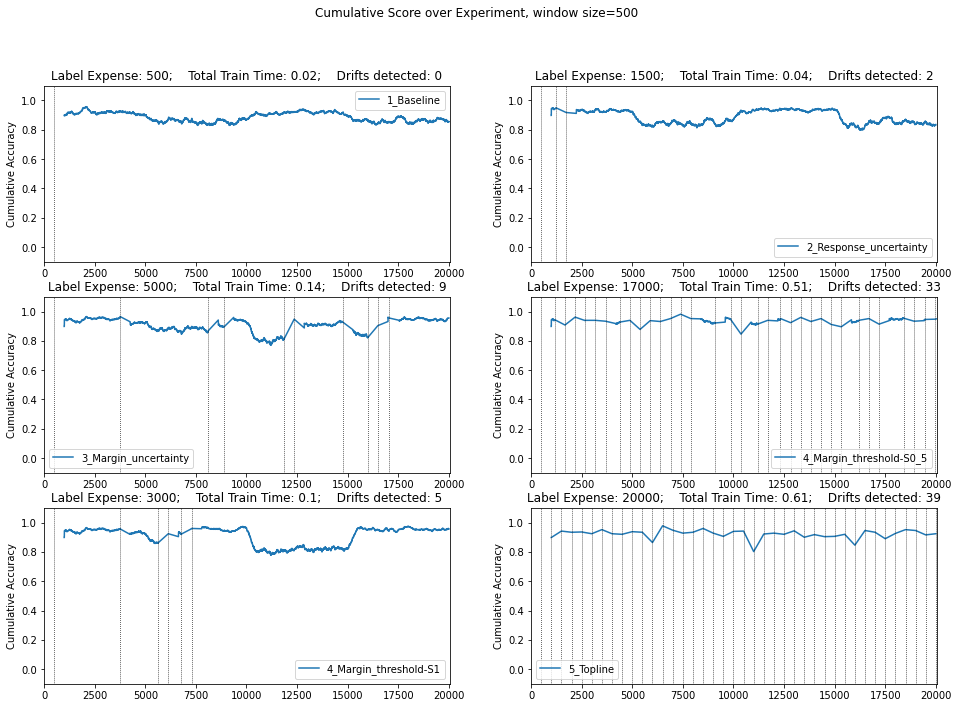

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.025,0,0,0,0,0.856000,0.000000
2_Response_uncertainty,0.04,0.075,2,1,2,1,0.836000,0.000000
3_Margin_uncertainty,0.14,0.250,9,5,9,5,0.956000,0.000000
4_Margin_threshold-S0_5,0.51,0.850,33,3,30,0,0.964286,0.166667
4_Margin_threshold-S1,0.10,0.150,5,3,5,3,0.956000,0.000000
5_Topline,0.61,1.000,39,1,38,0,0.924000,0.050000


Running experiments with window size = 1500


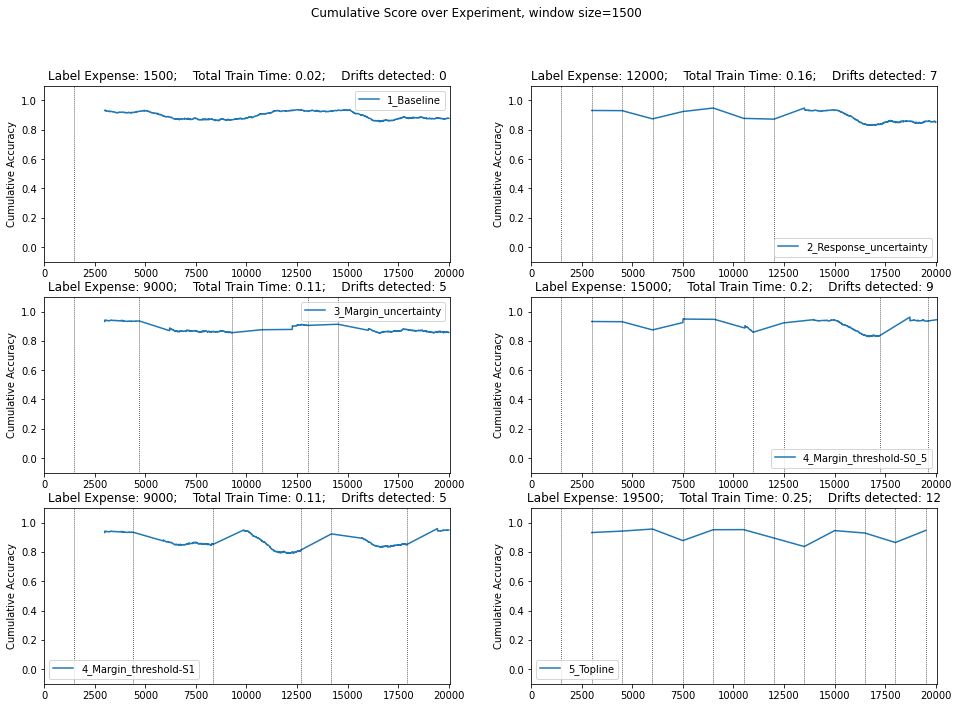

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.075,0,0,0,0,0.878100,0.000000
2_Response_uncertainty,0.16,0.600,7,1,6,0,0.852667,0.250000
3_Margin_uncertainty,0.11,0.450,5,2,5,2,0.857333,0.000000
4_Margin_threshold-S0_5,0.20,0.750,9,1,8,0,0.965087,0.200000
4_Margin_threshold-S1,0.11,0.450,5,4,5,4,0.948667,0.000000
5_Topline,0.25,0.975,12,2,10,0,0.946667,0.285714


Running experiments with window size = 2500


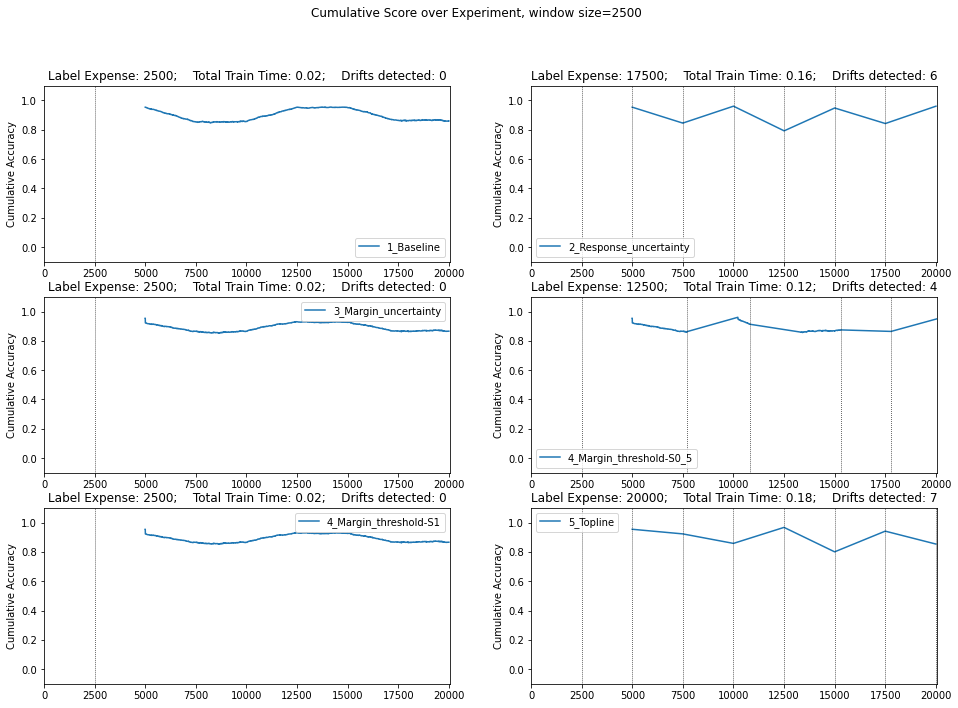

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.125,0,0,0,0,0.860400,0.00
2_Response_uncertainty,0.16,0.875,6,2,4,0,0.961122,0.50
3_Margin_uncertainty,0.02,0.125,0,1,0,1,0.866000,0.00
4_Margin_threshold-S0_5,0.12,0.625,4,3,4,3,0.959258,0.00
4_Margin_threshold-S1,0.02,0.125,0,1,0,1,0.866000,0.00
5_Topline,0.18,1.000,7,1,6,0,0.853600,0.25


Running experiments with window size = 3500


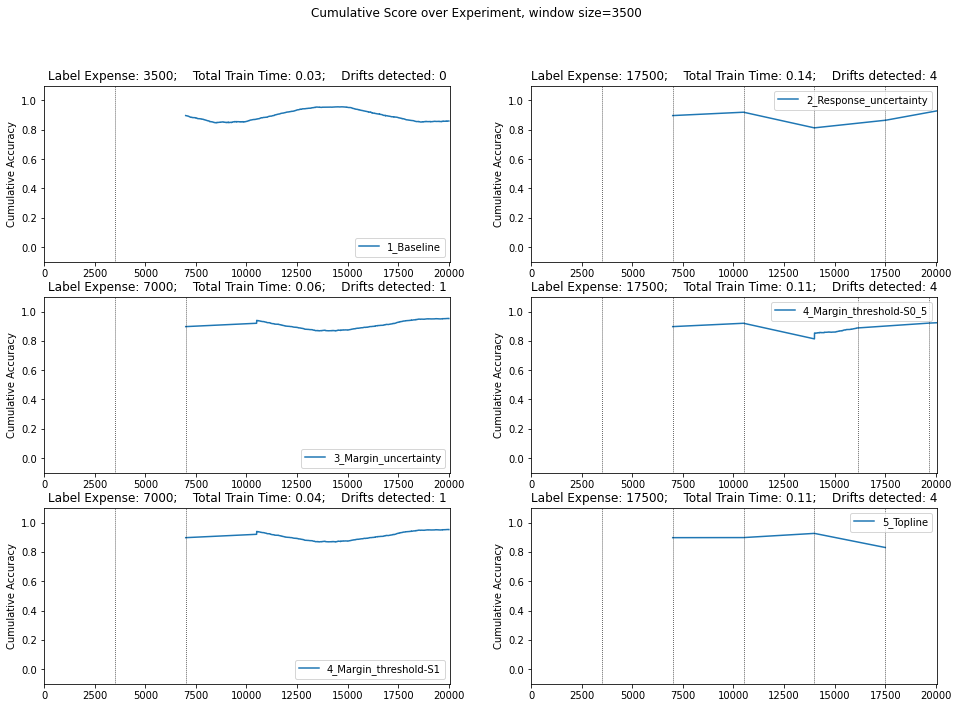

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.03,0.175,0,0,0,0,0.859943,0.0
2_Response_uncertainty,0.14,0.875,4,1,3,0,0.953144,0.4
3_Margin_uncertainty,0.06,0.350,1,2,1,2,0.952300,0.0
4_Margin_threshold-S0_5,0.11,0.875,4,1,4,1,0.942943,0.0
4_Margin_threshold-S1,0.04,0.350,1,2,1,2,0.952300,0.0
5_Topline,0.11,0.875,4,1,3,0,0.830000,0.4


In [7]:
# Run experiments
delete_csv=True
for size_w in [500, 1500, 2500, 3500]:
    # Define dataset
    name_ds = "_5_data_SEA_recurrente"
    dataset_5 = Dataset(name_ds, full_df=dataset_SEA_rec, column_mapping=column_mapping, window_size=size_w)
    # Run experiments
    print(f"Running experiments with window size = {dataset_5.window_size}")
    exps = define_run_exps(model, param_grid, dataset_5, delete_csv=delete_csv)
    delete_csv=False
    #Plot results
    fig, axs = plt.subplots(ncols=2, nrows=3, figsize = (16,11))
    axs = axs.flatten()
    i = 0
    for exp in exps:
        plot_experiment_error(exp, show_trainings=True, ax=axs[i])
        i+=1
    fig.suptitle(f"Cumulative Score over Experiment, window size={dataset_5.window_size}")
    plt.show()
    #plot_multiple_experiments(exps, change_points)
    display(aggregate_experiment_metrics(exps))

##### Inspección visual de resultados

Visualización de la distribución en las zonas detectadas como drift en Exp 2:


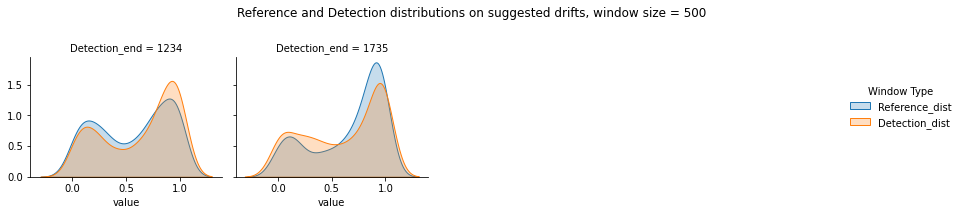

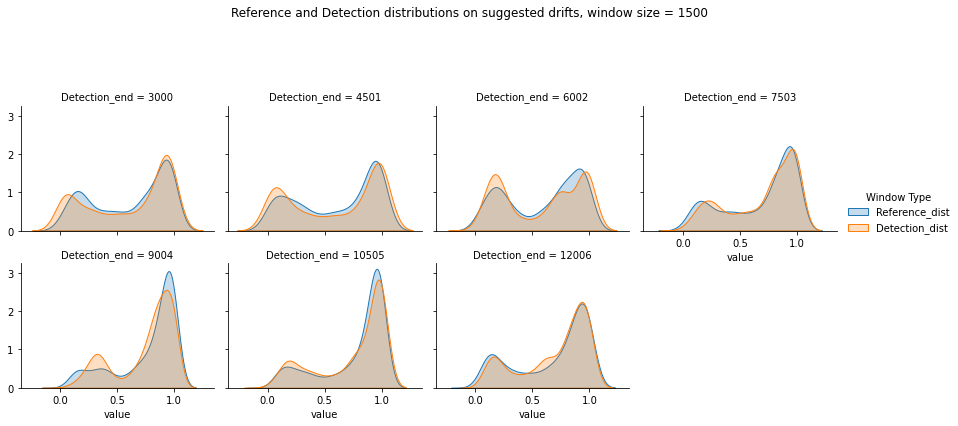

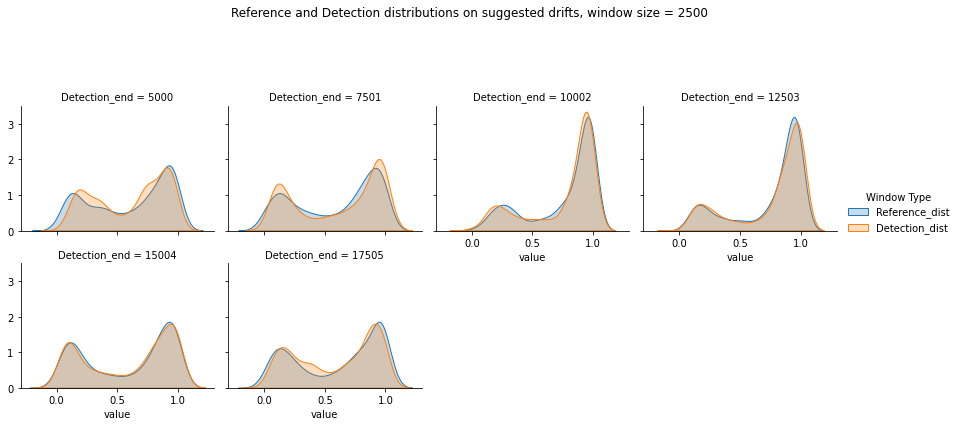

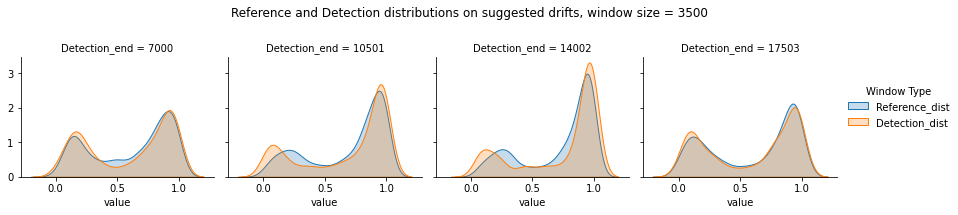

In [12]:
results_KS = pd.read_csv("./results/_5_data_SEA_recurrente_2_Response_uncertainty_results.csv", sep=",")

print("Visualización de la distribución en las zonas detectadas como drift en Exp 2:")
plot_KS_drift_distributions(results_KS,[500, 1500, 2500, 3500])

Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:


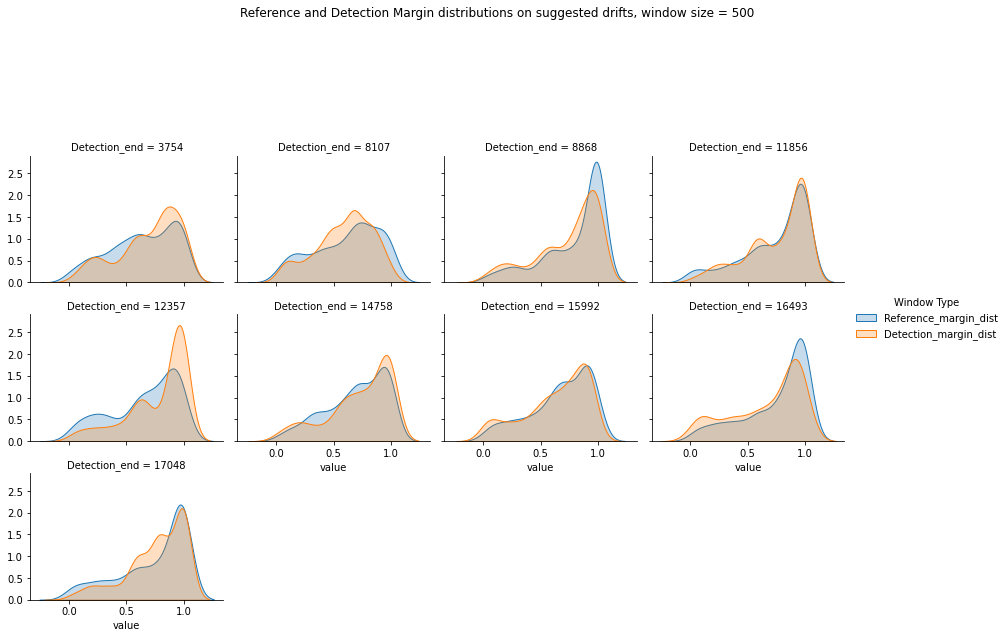

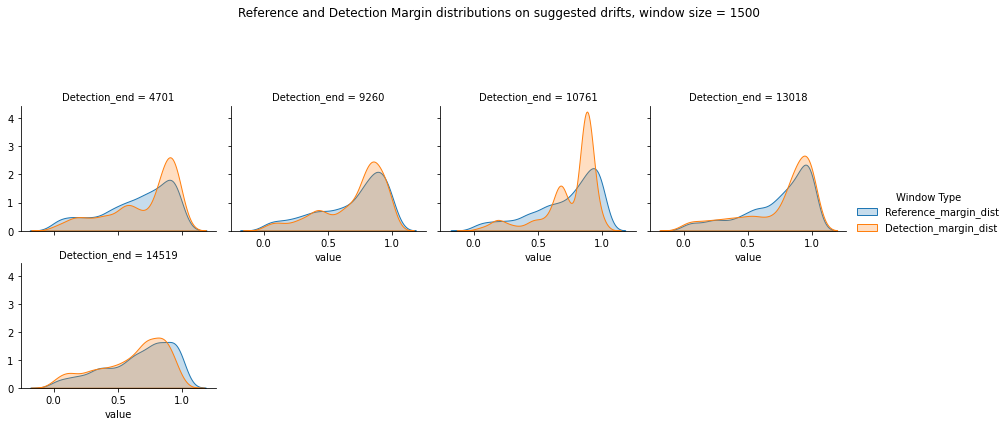

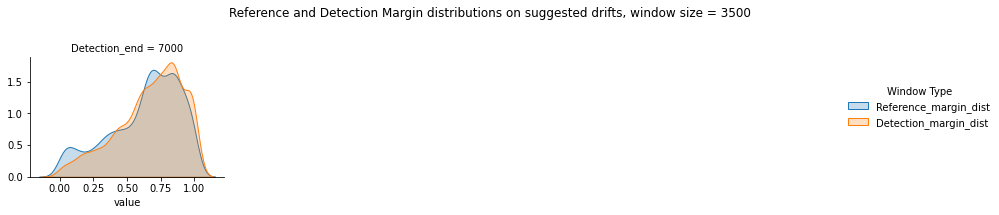

In [14]:
results_XS = pd.read_csv("./results/_5_data_SEA_recurrente_3_Margin_uncertainty_results.csv", sep=",", low_memory=False)

print("Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:")
plot_XS_drift_margin_distributions(results_XS, [500, 1500, 2500, 3500])

### SEA - Gradual

In [8]:
# Load data
change_points = [9750]

column_mapping = {
    "target": "target",
    "int_features": ["v", "w", "x"],
    "float_features": [],
}

dataset_SEA_grad = pd.read_csv("./datasets/_6_data_SEA_gradual.csv")

model = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=5)
param_grid = {"clf__n_estimators": [5], "clf__max_depth": [5]}

Running experiments with window size = 500


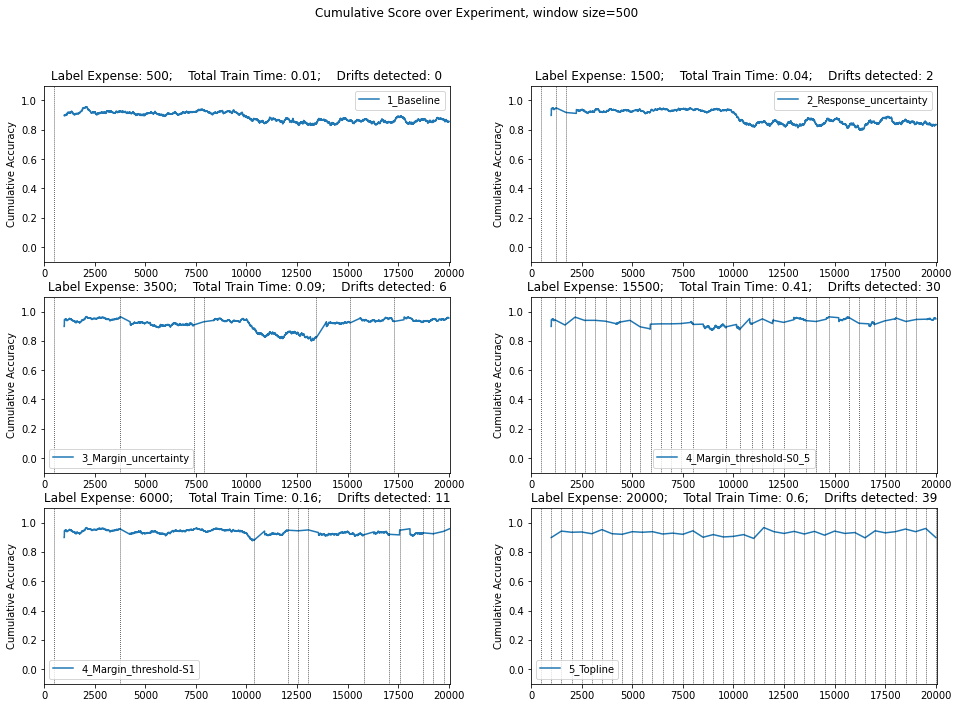

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.01,0.025,0,0,0,0,0.858000,0
2_Response_uncertainty,0.04,0.075,2,1,2,1,0.836000,0
3_Margin_uncertainty,0.09,0.175,6,2,6,2,0.956000,0
4_Margin_threshold-S0_5,0.41,0.775,30,0,30,0,0.950000,0
4_Margin_threshold-S1,0.16,0.300,11,1,11,1,0.969811,0
5_Topline,0.60,1.000,39,0,39,0,0.898000,0


Running experiments with window size = 1500


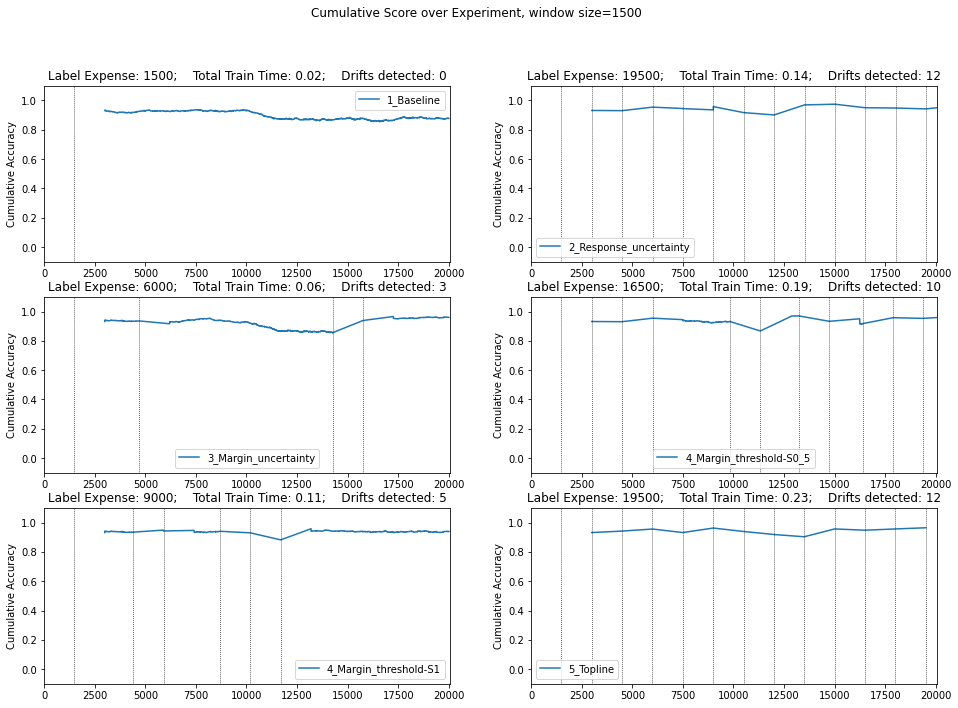

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.075,0,0,0,0,0.877400,0.000000
2_Response_uncertainty,0.14,0.975,12,1,11,0,0.964876,0.153846
3_Margin_uncertainty,0.06,0.300,3,2,3,2,0.960000,0.000000
4_Margin_threshold-S0_5,0.19,0.825,10,1,9,0,0.965909,0.181818
4_Margin_threshold-S1,0.11,0.450,5,1,4,0,0.939333,0.333333
5_Topline,0.23,0.975,12,0,12,0,0.964667,0.000000


Running experiments with window size = 2500


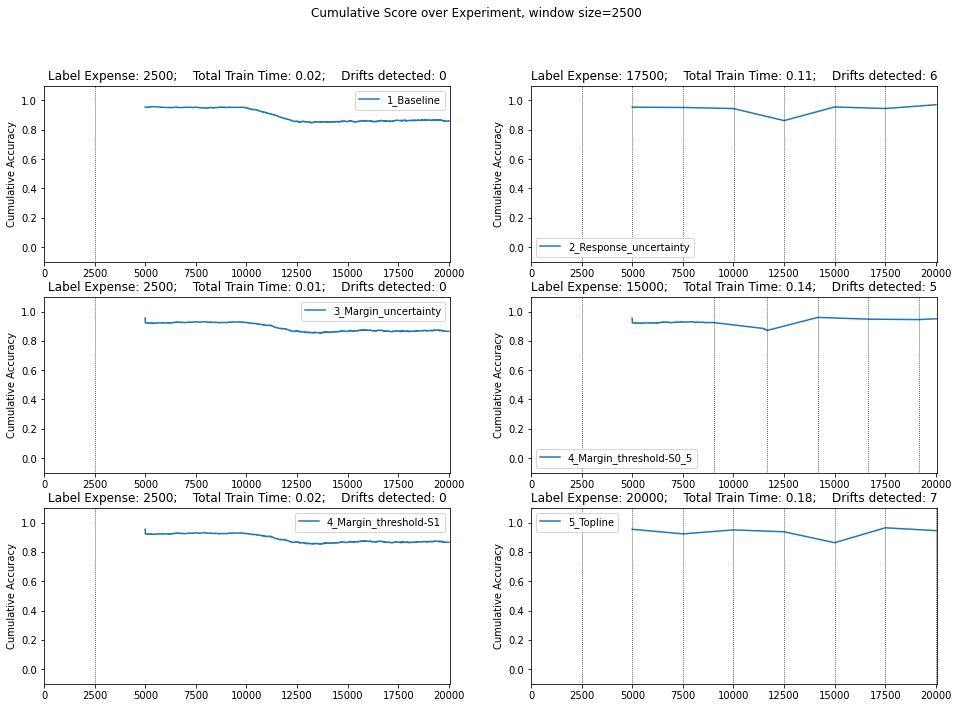

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.125,0,0,0,0,0.860400,0.000000
2_Response_uncertainty,0.11,0.875,6,1,5,0,0.971142,0.285714
3_Margin_uncertainty,0.01,0.125,0,1,0,1,0.865600,0.000000
4_Margin_threshold-S0_5,0.14,0.750,5,1,5,1,0.961538,0.000000
4_Margin_threshold-S1,0.02,0.125,0,1,0,1,0.865600,0.000000
5_Topline,0.18,1.000,7,2,5,0,0.945200,0.444444


Running experiments with window size = 3500


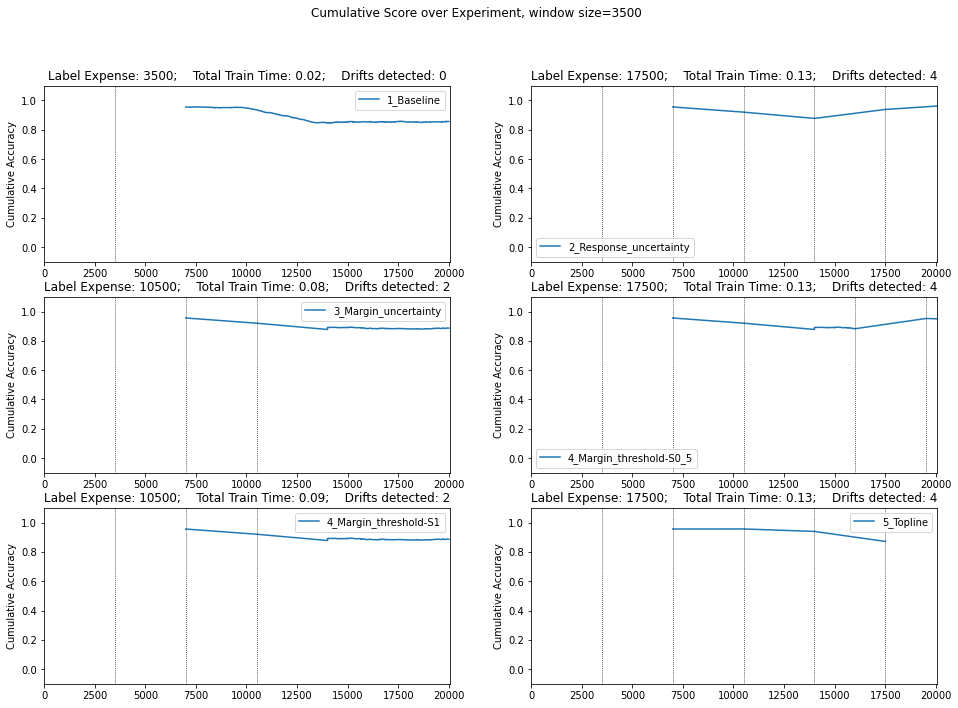

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.175,0,0,0,0,0.856700,0.0
2_Response_uncertainty,0.13,0.875,4,0,4,0,0.970765,0.0
3_Margin_uncertainty,0.08,0.525,2,0,2,0,0.886857,0.0
4_Margin_threshold-S0_5,0.13,0.875,4,0,4,0,0.938398,0.0
4_Margin_threshold-S1,0.09,0.525,2,0,2,0,0.886857,0.0
5_Topline,0.13,0.875,4,1,3,0,0.871429,0.4


In [9]:
# Run experiments
delete_csv=True
for size_w in [500, 1500, 2500, 3500]:
    # Define dataset
    name_ds = "_6_data_SEA_gradual"
    dataset_6 = Dataset(name_ds, full_df=dataset_SEA_grad, column_mapping=column_mapping, window_size=size_w)
    # Run experiments
    print(f"Running experiments with window size = {dataset_6.window_size}")
    exps = define_run_exps(model, param_grid, dataset_6, delete_csv=delete_csv)
    delete_csv=False
    #Plot results
    fig, axs = plt.subplots(ncols=2, nrows=3, figsize = (16,11))
    axs = axs.flatten()
    i = 0
    for exp in exps:
        plot_experiment_error(exp, show_trainings=True, ax=axs[i])
        i+=1
    fig.suptitle(f"Cumulative Score over Experiment, window size={dataset_6.window_size}")
    plt.show()
    #plot_multiple_experiments(exps, change_points)
    display(aggregate_experiment_metrics(exps))

##### Inspección visual de resultados

Visualización de la distribución en las zonas detectadas como drift en Exp 2:


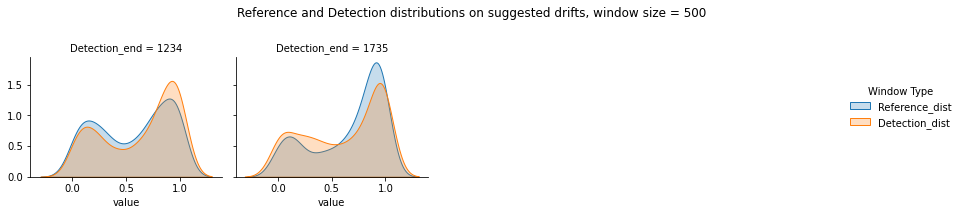

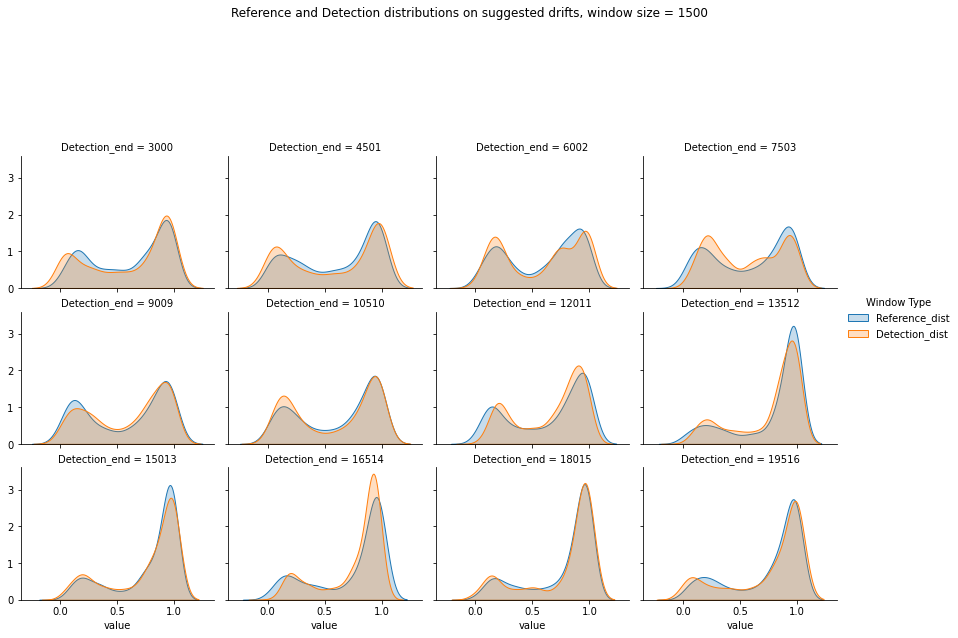

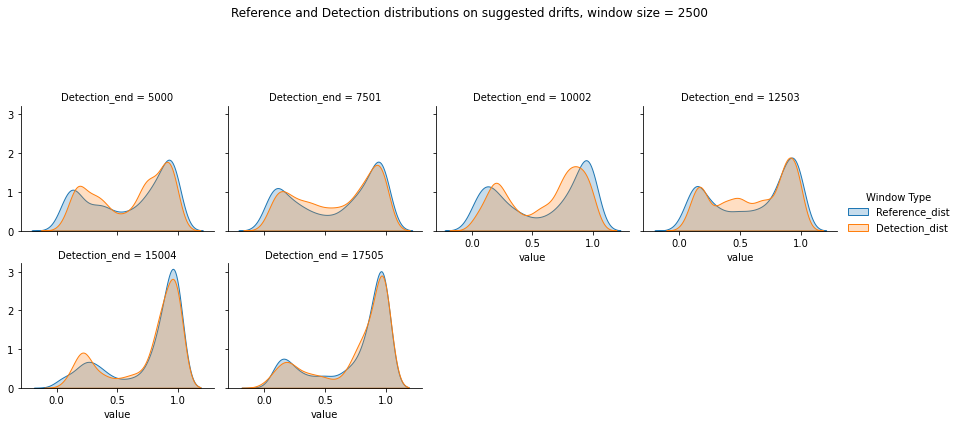

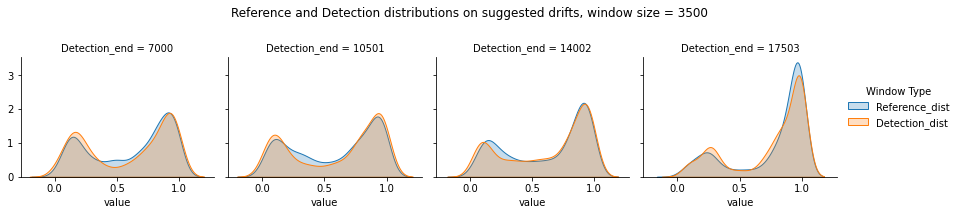

In [15]:
results_KS = pd.read_csv("./results/_6_data_SEA_gradual_2_Response_uncertainty_results.csv", sep=",")

print("Visualización de la distribución en las zonas detectadas como drift en Exp 2:")
plot_KS_drift_distributions(results_KS,[500, 1500, 2500, 3500])

Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:


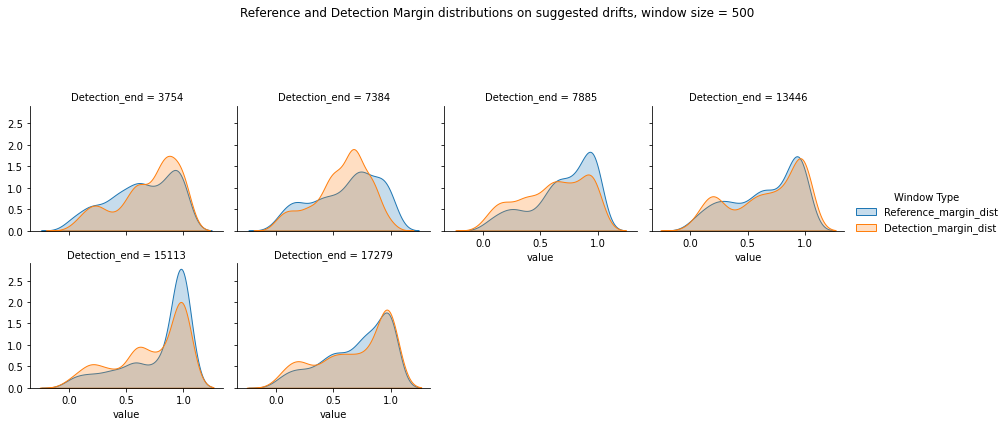

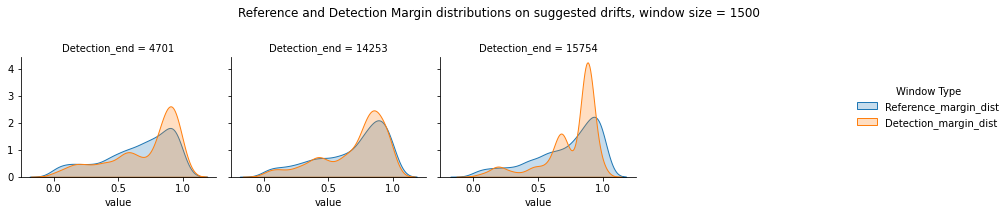

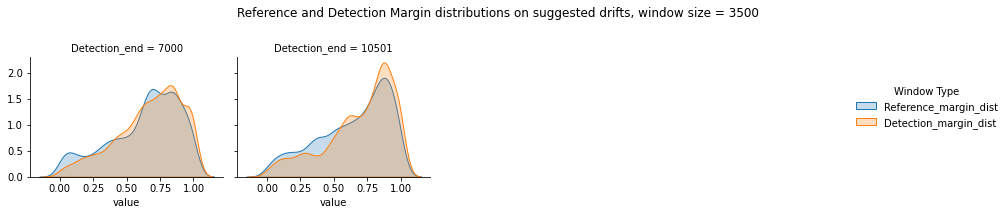

In [16]:
results_XS = pd.read_csv("./results/_6_data_SEA_gradual_3_Margin_uncertainty_results.csv", sep=",", low_memory=False)

print("Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:")
plot_XS_drift_margin_distributions(results_XS, [500, 1500, 2500, 3500])